#**The Blockade effect**
Investigate the blockade effect on neutral atoms quantum machines.
* define custom devices on Pulser (https://pulser.readthedocs.io/en/stable/)
* How to reach a Rydberg state on a single qubits
* Maximal opposite entanglement with 2 qubits

##Probability of a Rydberg state
$n$ = number of qubits

$\Omega$ = rabi frequency 
\begin{equation}
\mathbb{P}_{|r\rangle}(t)=\frac{1}{n}sin^2(\frac{\Omega}{2}\sqrt{n}t)
\end{equation}
Time to reach maximal opposite entanglement
\begin{equation}
t=\frac{\pi}{\sqrt{n}\Omega}
\end{equation}


In [ ]:
!pip install pulser==0.17.4

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

def plot_distribution(count_dict):
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(count_dict.keys(), count_dict.values(), width=0.5)
    plt.xticks(rotation='vertical')
    plt.show()

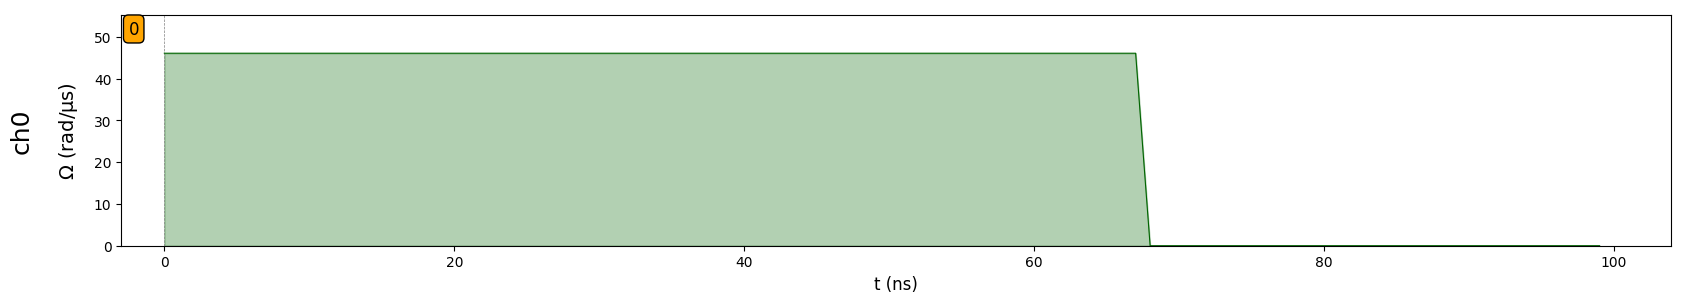

Counter({'1': 999, '0': 1})


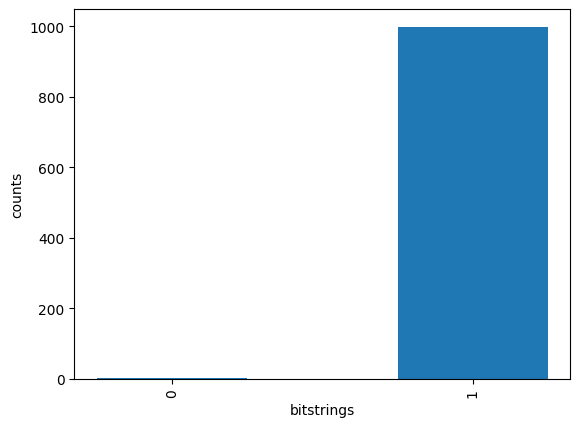

In [15]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice
from pulser_simulation import QutipEmulator
import warnings
import random

random.seed(42)
np.random.seed(42)  


warnings.filterwarnings('ignore')

n=1
qubit = {0: [0,0]}
# n=3
# qubit = {0: [0,0], 1:[0,6], 2:[np.sqrt(36-(3)**2),3]}
reg = Register(qubit)
# rydberg radius
r = 7
# rabi frequency
omega=MockDevice.rabi_from_blockade(r)
# time to reach |r> with rabi frequency omega
t=np.pi/(np.sqrt(n)*omega)

# create sequence
seq = Sequence(reg, MockDevice)
pulse = Pulse.ConstantPulse(t*1000, omega, 0, 0)
seq.declare_channel("ch0", "rydberg_local", initial_target=0)
seq.add(pulse, "ch0")

# create sequence
# seq.declare_channel("ch0", "rydberg_local", initial_target=0)
# seq.declare_channel("ch1", "rydberg_local", initial_target=1)
# seq.declare_channel("ch2", "rydberg_local", initial_target=2)
# seq.add(pulse, "ch0")
# seq.add(pulse, "ch1")
# seq.add(pulse, "ch2")


seq.draw()

# measurement
seq.measure('ground-rydberg')   

sim = QutipEmulator.from_sequence(seq, sampling_rate=0.5)
sim.set_initial_state='all-ground'
sim.set_evaluation_times = np.linspace(0, sim._tot_duration/1000, 10)
results = sim.run(nsteps=10000)

counter = results.sample_final_state(N_samples=1000)
print(counter)

plot_distribution(counter)